For logistic with AUC only

In [1]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import os.path

In [2]:
Model = "logistic"
TrainPattern = "parallel"

# Index of the current setting
Index = 2
#batchsize = 15000
# number of transmission iterations
kNum = 50
# number of iterations
niter = 100

# number of local updates
QList = [5, 10, 25]
# factor of the proximal term
muList = [0, 0.1]




# AUC or ll
statType = "AUC"
# statType = "ll"

In [15]:
# read the assisted learning data
infile = open("AE_AL_result_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
AEAL_values = new_dict[statType]
oracle_values = new_dict[statType + "_oracle"]


In [16]:
# read the assisted learning data without finetuning
infile_NFT = open("AE_AL_without_finetuning_result_dic.p", 'rb')
new_dict_NFT = pickle.load(infile_NFT)
infile_NFT.close()
AEAL_values_NFT = new_dict_NFT[statType]
oracle_values_NFT = new_dict_NFT[statType + "_oracle"]


In [5]:
# print values of the AUC. For the oracle model without CEature extraction (test15_AE_AL_without_CEature_extraction.ipynb),
# the AUC is 0.5476666666666666
print(oracle_values)
print(AEAL_values[0:5])
print(oracle_values_NFT)
print(AEAL_values_NFT[0:5])

0.8779556700609331
[0.8307303807303807, 0.8776510039667933, 0.8781192491718806, 0.8780354148775201, 0.8780292806608597]
0.8299963194700037
[0.7218234981392877, 0.8293808530650635, 0.8299595141700404, 0.8299942747311168, 0.8299860957755694]


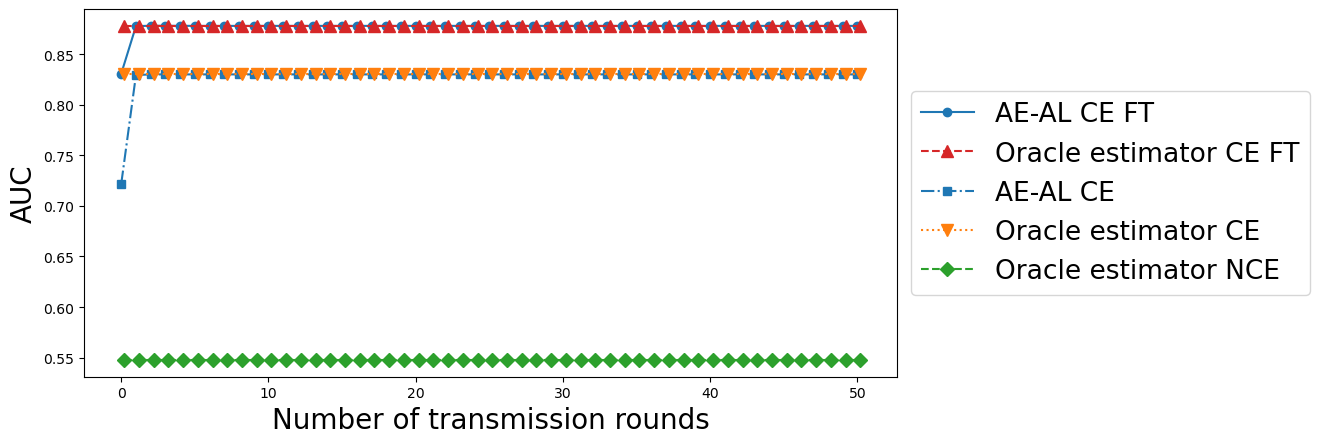

In [ ]:
# # number of plots
# NumPlots = 1
# niterList = np.array(range(kNum + 1))
# #==========================Setting 1================================
# fit, axes = plt.subplots(1,1, figsize = (9, 8))
# fit.set_size_inches(14, 5)   
# #fit.suptitle( 'Setting ' + str(Index) + ', AR(1) ' + r'$\rho=' + str(sig) + '$', fontsize=20)  
# #fit.suptitle( 'Setting ' + str(Index), fontsize=20) 
# #nList = ['n=300', 'n=2000']
# for i in range(NumPlots):
#     #axe = axes[i]
#     if NumPlots == 1:
#         axe = axes
#     else:
#         axe = axes[i]        
    
#     # original AEAL results
#     axe.plot(niterList, AEAL_values, marker='o', label='AEAL')
#     axe.plot(niterList + 0.2, np.repeat(np.mean(oracle_values), kNum + 1),
#             marker='^', linestyle='--', markersize=8, color='tab:red', label='Oracle')

#     # AEAL without fine-tuning
#     axe.plot(niterList, AEAL_values_NFT, marker='s', linestyle='-.',
#             label='AEAL_NFT', color='tab:blue')
#     axe.plot(niterList + 0.2, np.repeat(np.mean(oracle_values_NFT), kNum + 1),
#             marker='v', linestyle=':', markersize=8, color='tab:orange', label='Oracle_NFT')
    
#     # oracle logistic regression model with l1 penalty and without CEature extraction
#     axe.plot(niterList + 0.2, np.repeat(0.5476666666666666, kNum + 1),
#          marker='D', linestyle='--', markersize=7, color='tab:green', label='Oracle_NFT_const')


#     axe.set_xlabel("Number of transmission rounds", fontsize=20)
#     if statType == "AUC":
#         axe.set_ylabel("AUC", fontsize=20)
#     elif statType == "ll":
#         axe.set_ylabel("Log-likelihood", fontsize=20)
#     #axe.set_title(nList[i], fontsize=20)
    
#     if i==(NumPlots - 1):
#         axe.legend(['AE-AL CE FT', 'Oracle estimator CE FT',
#                     'AE-AL CE', 'Oracle estimator CE',
#                     'Oracle estimator NCE'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
#     elif i<(NumPlots - 1):
#         axe.legend('',frameon=False)
# plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])




In [8]:
type(oracle_values)

numpy.float64

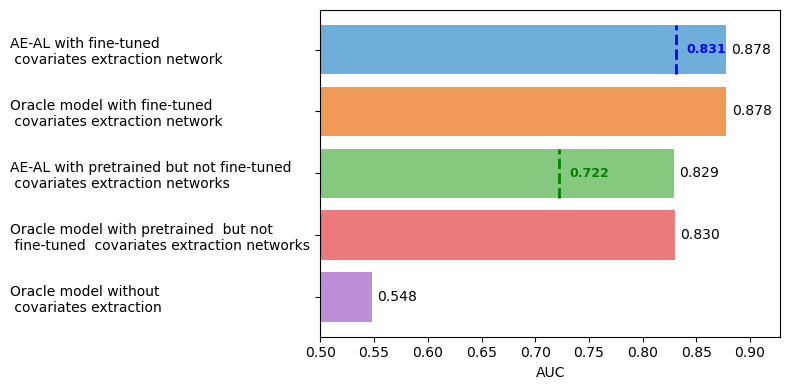

In [73]:
# the oracle AUC based on raw image data. Obtained from test4_training_oracle_without_feature_extraction.ipynb
baseline_value = 0.5476666666666666

# Labels, values, and colors
labels = ['AE-AL with fine-tuned \n covariates extraction network', 'Oracle model with fine-tuned \n covariates extraction network', 'AE-AL with pretrained but not fine-tuned \n covariates extraction networks', 'Oracle model with pretrained  but not \n fine-tuned  covariates extraction networks', 'Oracle model without \n covariates extraction']
values = [AEAL_values[1], oracle_values, AEAL_values_NFT[1], oracle_values_NFT, baseline_value]
colors = ['#6FAED9', '#F19956', '#84C97D', '#EC7A7A', '#BD8FD9']

# Reverse for top-to-bottom orientation
labels = labels[::-1]
values = values[::-1]
colors = colors[::-1]

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(labels, values, color=colors)
ax.set_xlabel('AUC')
# ax.set_title('Comparison of Methods with Dashed Reference Lines')

# Get y-center positions of the bars
y_centers = [bar.get_y() + bar.get_height() / 2 for bar in bars]
label_to_ycenter = dict(zip(labels, y_centers))

# Dashed line and number for AE-AL
x_val = AEAL_values[0]
y = label_to_ycenter['AE-AL with fine-tuned \n covariates extraction network']
ax.vlines(x=x_val, ymin=y - 0.4, ymax=y + 0.4, color='blue', linestyle='--', linewidth=2)
ax.text(x_val + 0.01, y, f'{x_val:.3f}', va='center', ha='left', color='blue', fontweight='bold', fontsize=9)

# Dashed line and number for AE-AL NFT
x_val = AEAL_values_NFT[0]
y = label_to_ycenter['AE-AL with pretrained but not fine-tuned \n covariates extraction networks']
ax.vlines(x=x_val, ymin=y - 0.4, ymax=y + 0.4, color='green', linestyle='--', linewidth=2)
ax.text(x_val + 0.01, y, f'{x_val:.3f}', va='center', ha='left', color='green', fontweight='bold', fontsize=9)

# Annotate bar ends
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.005,
            bar.get_y() + bar.get_height() / 2,
            f'{width:.3f}',
            va='center')

# Left align y-axis tick labels
for label in ax.get_yticklabels():
    label.set_horizontalalignment('left')
    

# Adjust left margin and move labels left so they don't overlap bars
plt.subplots_adjust(left=0.3)
ax.tick_params(axis='y', pad=220)

# Adjust x-axis limit
ax.set_xlim(0.5, max(values + [AEAL_values[0], AEAL_values_NFT[0]]) + 0.05)

plt.tight_layout()
# plt.show()

plt.savefig('Result_Figure_car_new_experiments' + statType + '.pdf')

In [24]:
# # Example setup
# niterList = np.array(range(kNum + 1))

# # Create subplots: two side-by-side
# # when sharey = True, the two plots share the same y-axis ticks
# fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
# fig.subplots_adjust(right=0.8)  # leave space for legend

# # Plot 1: with fine-tuning
# axes[0].plot(niterList, AEAL_values, marker='o', label='AEAL')
# axes[0].plot(niterList + 0.2, np.repeat(np.mean(oracle_values), kNum + 1),
#              marker='^', linestyle='--', markersize=8, color='tab:red', label='Oracle')
# axes[0].set_title("With Fine-Tuning", fontsize=18)
# axes[0].set_xlabel("Number of transmission rounds", fontsize=16)
# if statType == "AUC":
#     axes[0].set_ylabel("AUC", fontsize=16)
# elif statType == "ll":
#     axes[0].set_ylabel("Log-likelihood", fontsize=16)

# # Plot 2: without fine-tuning
# axes[1].plot(niterList, AEAL_values_NFT, marker='s', linestyle='-.',
#              label='AEAL_NFT', color='tab:blue')
# axes[1].plot(niterList + 0.2, np.repeat(np.mean(oracle_values_NFT), kNum + 1),
#              marker='v', linestyle=':', markersize=8, color='tab:orange', label='Oracle_NFT')
# axes[1].set_title("Without Fine-Tuning", fontsize=18)
# axes[1].set_xlabel("Number of transmission rounds", fontsize=16)

# # Combine legend and place it on the right
# lines_labels = [ax.get_legend_handles_labels() for ax in axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), fontsize=15)

# plt.tight_layout(rect=[0.03, 0.03, 0.82, 0.97])
# plt.savefig('Result_Figure_car_with_and_without_finetuning_' + statType + '.pdf')
